In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold ,cross_val_score , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

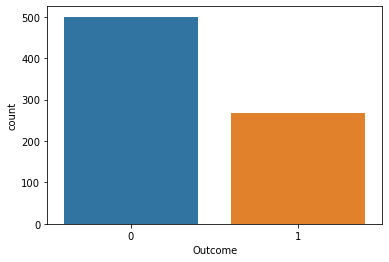

In [9]:
sns.countplot(data['Outcome'])

In [11]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

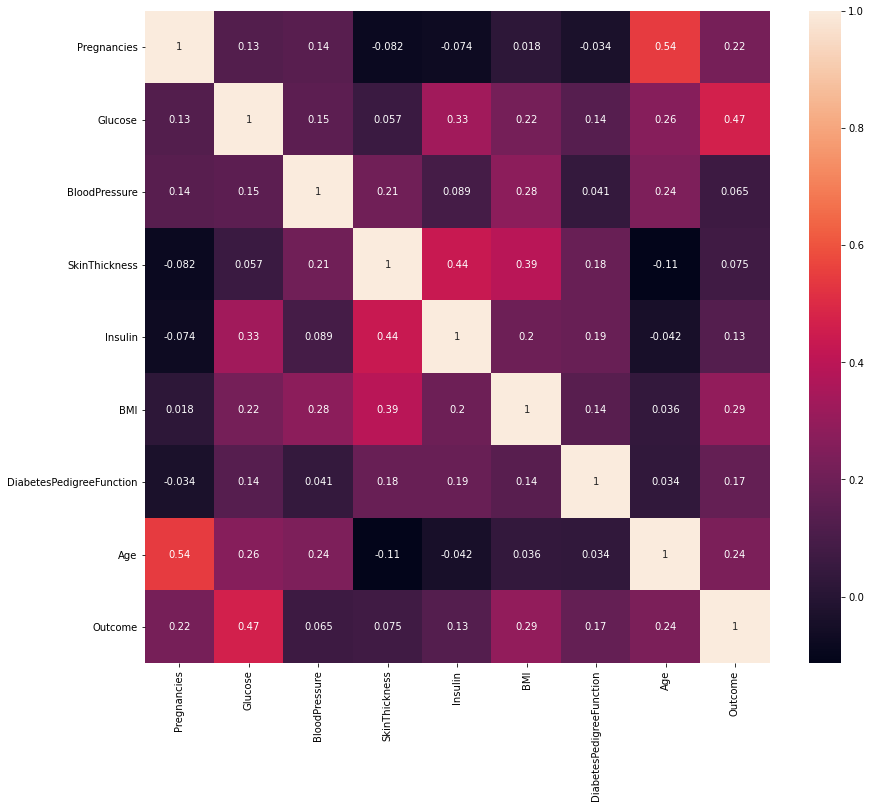

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(corr , annot = True)

In [24]:
x = data.drop('Outcome' , axis = 1)
y = data['Outcome']

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [30]:
print('Shape of X_train: ', x_train.shape)
print('Shape of X_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (614, 8)
Shape of X_test:  (154, 8)
Shape of y_train:  (614,)
Shape of y_test:  (154,)


Text(0, 0.5, 'Error Rate')

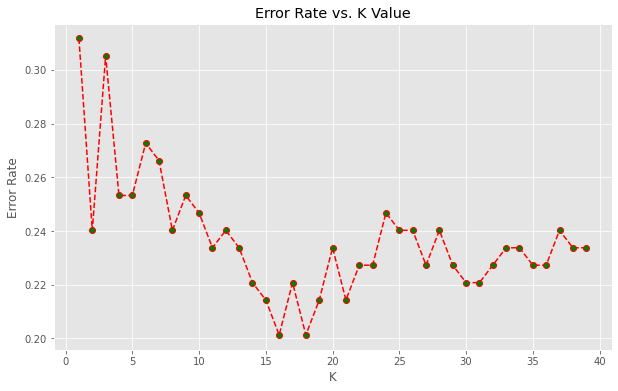

In [33]:
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict=knn.predict(x_test)
    err_rate.append(np.mean(predict!=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

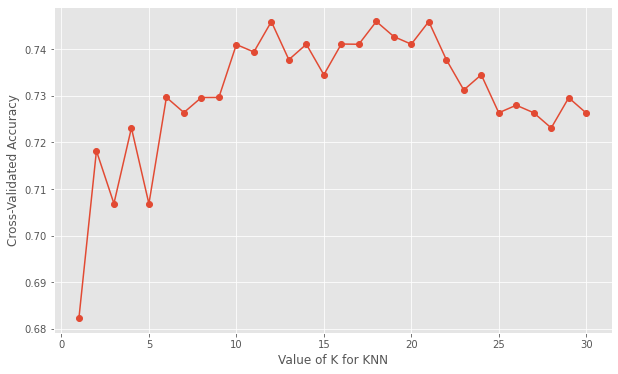

In [36]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [50]:
# parameters selection
kf = KFold(n_splits=15)
grid_params ={
    'n_neighbors':[11,12,13,14,15],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10, cv=6,n_jobs=-1)
gs_results = gs.fit(x_train, y_train)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


C:\Users\Rumana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.73121708 0.72309474
 0.73605559 0.73283521 0.74255981 0.74097341 0.75068215 0.74092582
 0.73933943 0.75071388]
  warnings.warn(


In [51]:
gs_results.best_score_

0.7507138777841234

In [52]:
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

In [57]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

In [60]:
pred = model.predict(x_test)
acc_final= accuracy_score(y_test,pred)
print("The accuracy is  {}".format(acc_final))

The accuracy is  0.7792207792207793


Classification Report                precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.62      0.59      0.60        44

    accuracy                           0.78       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.78      0.78      0.78       154



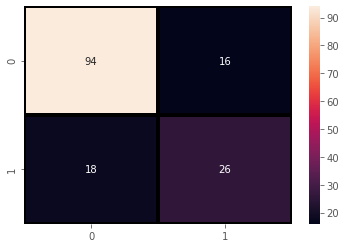

In [64]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred))

In [65]:
confusion_matrix(y_test , pred)

array([[94, 16],
       [18, 26]], dtype=int64)